In [1]:
from src.model import PyTradeShifts
import os
import numpy as np

In [2]:
print(os.getcwd())
# Go up one directory to get to the data folder
data_dir = os.path.join(os.path.dirname(os.getcwd()))
os.chdir(data_dir)
print(os.getcwd())

/home/florian/Documents/GitHub/pytradeshifts/scripts
/home/florian/Documents/GitHub/pytradeshifts


Loaded data for Wheat in Y2018.
Removed countries with trade below the 75th percentile.


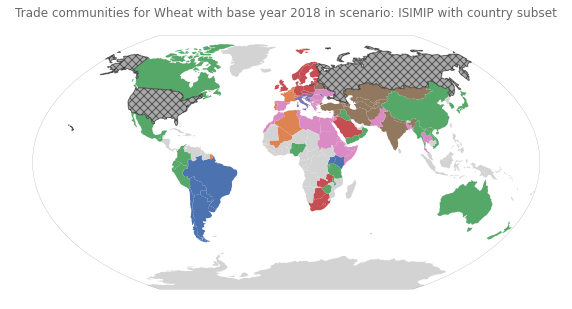

In [3]:
ISIMIP = PyTradeShifts(
    crop="Wheat",
    base_year=2018,
    scenario_file_name="ISIMIP_wheat_Hedlung.csv",
    scenario_name="ISIMIP",
    countries_to_remove=["USA", "Russia"],
)


In [4]:
len(ISIMIP.trade_matrix.columns)

104

In [5]:
import country_converter as coco
import pandas as pd

In [6]:
df = pd.read_clipboard(index_col=0)

ParserError: Expected 13 fields in line 4, saw 14. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.

In [ ]:
hedlung_names = coco.convert(names=df.index, to="name_short", not_found=None)

In [ ]:
len(hedlung_names)

0

In [ ]:
# Compare hedlung names to ISIMIP names and print where they don't match
for name in hedlung_names:
    if name not in ISIMIP.trade_matrix.columns:
        print(name)

In [ ]:
# now the other way around
for name in ISIMIP.trade_matrix.columns:
    if name not in hedlung_names:
        print(name)

Afghanistan
Albania
Algeria
Argentina
Armenia
Australia
Austria
Azerbaijan
Bangladesh
Belarus
Belgium
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Bulgaria
Burundi
Canada
Chile
China
Colombia
Croatia
Cyprus
Czechia
Denmark
Ecuador
Egypt
Eritrea
Estonia
Ethiopia
Finland
France
Georgia
Germany
Greece
Guatemala
Hungary
India
Iran
Iraq
Ireland
Israel
Italy
Japan
Jordan
Kazakhstan
Kenya
Kuwait
Kyrgyz Republic
Laos
Latvia
Lebanon
Lesotho
Libya
Lithuania
Luxembourg
Malawi
Mali
Mexico
Moldova
Mongolia
Montenegro
Morocco
Myanmar
Nepal
Netherlands
New Zealand
Nigeria
North Macedonia
Norway
Oman
Pakistan
Paraguay
Peru
Poland
Portugal
Romania
Rwanda
Saudi Arabia
Serbia
Slovakia
Somalia
South Africa
South Korea
Spain
Sudan
Sweden
Switzerland
Syria
Tajikistan
Tanzania
Thailand
Tunisia
Turkmenistan
Türkiye
Uganda
Ukraine
United Kingdom
Uruguay
Uzbekistan
Vietnam
Yemen
Zambia
Zimbabwe


In [ ]:
trade = ISIMIP.trade_matrix
np.fill_diagonal(trade.values, 0)
trade.head()

,Afghanistan,Albania,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Bangladesh,Belarus,...,Türkiye,Uganda,Ukraine,United Kingdom,Uruguay,Uzbekistan,Vietnam,Yemen,Zambia,Zimbabwe
Afghanistan,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
Albania,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
Algeria,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
Argentina,0.0,0.0,1.452888e+06,0.0,0.0,0.0,0.0,0.0,275090.275569,0.0,...,0.0,82073.301434,0.0,123.856249,479.514222,0.0,240408.283674,0.0,0.0,174.662807
Armenia,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
